<a href="https://colab.research.google.com/github/learneverythingai/Shivam-Modi-Data-Science-Analytics-Course/blob/main/Deep%20Learning%20Course/Time_series_part-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Author and Instructor of this Notebook is **Shivam Modi**.

## LinkedIn: https://www.linkedin.com/in/shivam-modi-datascientist/

#Time Series
Time series arise as recordings of processes which vary over a particular time interval. A recording can be either continuous trace or set of discrete observations. By appropriately choosing origin and scale we can define observed time as $t_1,t_2.....T$ and observation as $Y_1,Y_2.....Y_T$. Where as "Time-Series Forecasting" is the process of using a statistical model to predict future values of a time-series based on past results.<p>
Number of things to be noted while performing time series analysis:
* Modelling : We want to develop a simple mathematical model which
explains the observed pattern of $Y_1,Y_2, . . . ,Y_T$ . This model may depend on unknown parameters and need to be estimated.
* Forecasting : On the basis of the above observation we wish to predict what will be the value of $Y_{T+L}$ and this will give the uncertainty in the prediction.
* Controlling : It states the process which is producing the
$Y_t$ values in such a way that the future values can be modified to produce a required/respective outcome.
 
<p>Components of Time-Series:-
 
1. Trends : It shows the direction of time-series data over a particular interval of time. It can be increasing, decreasing or horizontal i.e., upward, downward or stationary respectively.
 
2. Seasionality : It exhibits a trend which repeats with respect to timing, magnitude and direction.
 
3. Cyclical component : These are the trends with no repetition over a particular time period.A cycle red=fers to ups & downs and are mostly observed in business areas.
 
4. Irregular Variation : These are the fluctuations in the time series data which become transparent when trend and cyclical variations are removed. These variations are unpredictable, inconsistent, and may or may not be random.


# Covid-19 Forecasting

Dataset can be downloaded from the given link : [Dataset](https://drive.google.com/file/d/1WDz10aVdFetLN_R4mSkzugqb2s5gpr89/view?usp=sharing)

In [ ]:
#Importing necessary and required modules
import os
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python import keras
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np
from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('/content/dataset.csv',usecols=[5]).values.astype('float64')

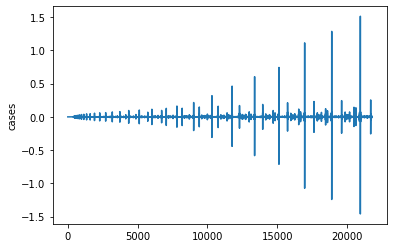

In [ ]:
#Shift features and labels one step relative to each other
def delta_time_series(data):
    return data[1:]- data[:-1]

dataset = delta_time_series(dataset)
dataset.shape
#plotting the dataset
def plot_delta(data):
    plt.plot(delta_time_series(data))
    plt.ylabel('cases')
    plt.show()
    
plot_delta(dataset) 

In [ ]:
# Helper function to get y as a numpy array from the TimeseriesGenerator
def get_y_from_generator(gen):
    y = None
    for i in range(len(gen)):
        batch_y = gen[i][1]
        if y is None:
            y = batch_y
        else:
            y = np.append(y, batch_y)
    y = y.reshape((-1,1))
    print(y.shape)
    return y

The above set of codes will divide the dataset into training dataset(first 16,000 rows of the data) and the remaining will be the validation and test dataset .

In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train, val, test = dataset[0:16000, :], dataset[16001:17000, :], dataset[17001:None, :]
lookback = 100
step = 1
batch_size = 128

#assigning the dataset after splitation 
train_data_gen = TimeseriesGenerator(train, train,
                                     length=lookback, sampling_rate=step, stride=1,shuffle=True,
                                     batch_size=batch_size)

val_data_gen = TimeseriesGenerator(val, val,
                                   length=lookback, sampling_rate=step, stride=1,
                                   batch_size=batch_size)

test_data_gen = TimeseriesGenerator(test, test,
                                    length=lookback, sampling_rate=step, stride=1,
                                    batch_size=batch_size)

val_steps = (17000 - 16001 - lookback)
test_steps = (len(dataset) - 17001 - lookback)

Epoch 1/10
125/125 [==============================] - 9s 59ms/step - loss: 0.0704 - val_loss: 0.0244
Epoch 2/10
125/125 [==============================] - 7s 52ms/step - loss: 0.0242 - val_loss: 0.0259
Epoch 3/10
125/125 [==============================] - 7s 53ms/step - loss: 0.0217 - val_loss: 0.0152
Epoch 4/10
125/125 [==============================] - 7s 52ms/step - loss: 0.0201 - val_loss: 0.0239
Epoch 5/10
125/125 [==============================] - 6s 51ms/step - loss: 0.0184 - val_loss: 0.0140
Epoch 6/10
125/125 [==============================] - 7s 53ms/step - loss: 0.0174 - val_loss: 0.0269
Epoch 7/10
125/125 [==============================] - 7s 53ms/step - loss: 0.0162 - val_loss: 0.0089
Epoch 8/10
125/125 [==============================] - 6s 51ms/step - loss: 0.0155 - val_loss: 0.0231
Epoch 9/10
125/125 [==============================] - 6s 51ms/step - loss: 0.0148 - val_loss: 0.0056
Epoch 10/10
125/125 [==============================] - 7s 52ms/step - loss: 0.0140 - val_lo

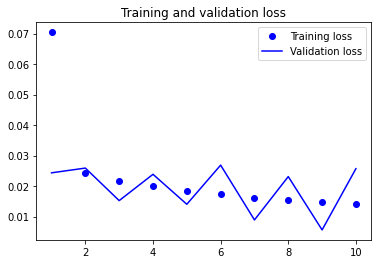

In [ ]:
#training the model
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32, dropout=0.2,input_shape=(None, dataset.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')

history = model.fit(train_data_gen,epochs=10,validation_data=val_data_gen)

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()



In [ ]:
test_loss = model.evaluate(test_data_gen,steps=test_steps)
print('test loss:', test_loss)
testPredict = model.predict(test_data_gen)
testPredict.shape
testY = get_y_from_generator(test_data_gen)




  35/4696 [..............................] - ETA: 1:47 - loss: 0.0253WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 4696 batches). You may need to use the repeat() function when building your dataset.


4696/4696 [==============================] - 1s 183us/step - loss: 0.0253
test loss: 0.0252920500934124
(4696, 1)


Test Score: 0.03 RMSE
Here "error" represents the difference between the predicted value and the true value.


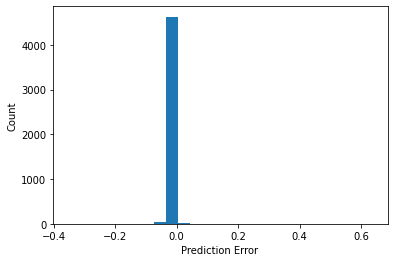

In [ ]:
from sklearn.metrics import mean_squared_error
import math
# calculate root mean squared error
testScore = math.sqrt(mean_squared_error(testY[:, 0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# error distribution
error = testPredict - testY
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error ")
plt.ylabel("Count")
print('Here "error" represents the difference between the predicted value and the true value.')